## Uber Data Analysis Visualization 
In this project I use Uber's NYC rideshare data from May-Sept 2014 to visualize peak days and times for rides across NYC.
With this, I can conclude how time affected customer trips and how riders would make various trips from different bases.

### 1.1 Load Libraries 

In [227]:
# Import Libraries
import pandas as pd
import numpy as np
from pandas import DataFrame
from subprocess import check_output

#Visualization modules
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#The matplotlib basemap toolkit is a library for plotting 2D data on maps in Python
from matplotlib import cm #Colormap

#Animation Modules
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

### 1.2 Load Data Files and Combine into One Dataframe

In [256]:
# Import Data files
apr_data = pd.read_csv('uber-raw-data-apr14.csv')
may_data = pd.read_csv('uber-raw-data-may14.csv')
jun_data = pd.read_csv('uber-raw-data-jun14.csv')
jull_data = pd.read_csv('uber-raw-data-jul14.csv')
aug_data = pd.read_csv('uber-raw-data-aug14.csv')
sep_data = pd.read_csv('uber-raw-data-sep14.csv')

# Combind Data files to one database
df = pd.concat([apr_data, may_data, jun_data, jull_data, aug_data, sep_data])
df.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


### 1.3 Data Preperation 

In [260]:
# Convert str object to date
df['Date/Time'] = pd.to_datetime(df['Date/Time'], format='%m/%d/%Y %H:%M:%S')
# ADD coloumns for time and days
df['Day'] = df['Date/Time'].dt.dayofweek
df['WeekDay'] = df['Date/Time'].dt.day_name()
df['MonthDay'] = df['Date/Time'].dt.day
df['Month'] = df['Date/Time'].dt.month
df['Year'] = df['Date/Time'].dt.year
df['Hour'] = df['Date/Time'].dt.hour
df['Minute'] = df['Date/Time'].dt.minute
df.head()

,Date/Time,Lat,Lon,Base,Day,WeekDay,MonthDay,Month,Year,Hour,Minute
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,1,Tuesday,1,4,2014,0,11
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,1,Tuesday,1,4,2014,0,17
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,1,Tuesday,1,4,2014,0,21
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,1,Tuesday,1,4,2014,0,28
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,1,Tuesday,1,4,2014,0,33


In [240]:
# Create pivot table for days
weekday = df.pivot_table(index=['WeekDay'], values='Base', aggfunc='count')
weekday.head()

,Base
WeekDay,
Friday,741139
Monday,541472
Saturday,646114
Sunday,490180
Thursday,755145


In [241]:
weekdayAvg = weekday/30
weekdayAvg.head()

,Base
WeekDay,
Friday,24704.633333
Monday,18049.066667
Saturday,21537.133333
Sunday,16339.333333
Thursday,25171.500000


### 2 Cross Analysis 
To begin my exploration I will vizualize the data using Bar charts.
First using Bar Charts:
 - Bar Chart by Average Rides Per Day Vs Weekday
 - Bar Chart by Average Rides During the Day
 - Bar Chart by Average Time of Rides
 - Bar Chart by Trips by Hour and Month
 - Bar Chart by Total Trips Everyday
 - Bar Chart by Trips by Day and Month
 - Bar Chart by Trips By Month

Text(0.5, 0, 'Average Rides Per Day VS Day of Week')

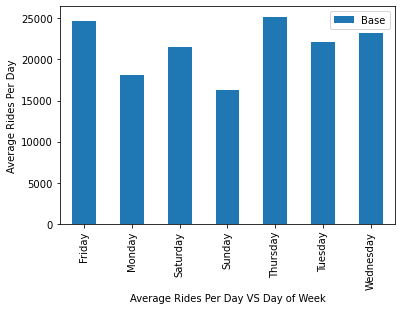

In [242]:
weekdayAvg.plot(kind='bar')
plt.ylabel('Average Rides Per Day')
plt.xlabel('Average Rides Per Day VS Day of Week')

Text(0.5, 0, 'Number of Rides VS Hour of Day')

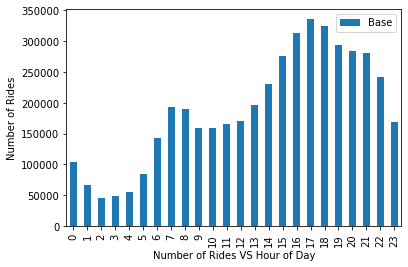

In [243]:
# Bar Chart of Avg Rides During the Day
# Create pivot table for hours
hours = df.pivot_table(index=['Hour'], values='Base', aggfunc='count')
hours/30
hours.plot(kind='bar')
plt.ylabel('Number of Rides')
plt.xlabel('Number of Rides VS Hour of Day')

<AxesSubplot:xlabel='Hour'>

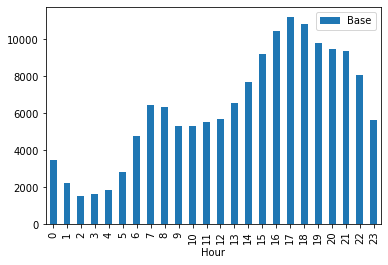

In [244]:
# Bar Chart of Average Time of Rides
avgHours = hours/30
avgHours.plot(kind='bar')

Text(0.5, 0, 'Number of Rides')

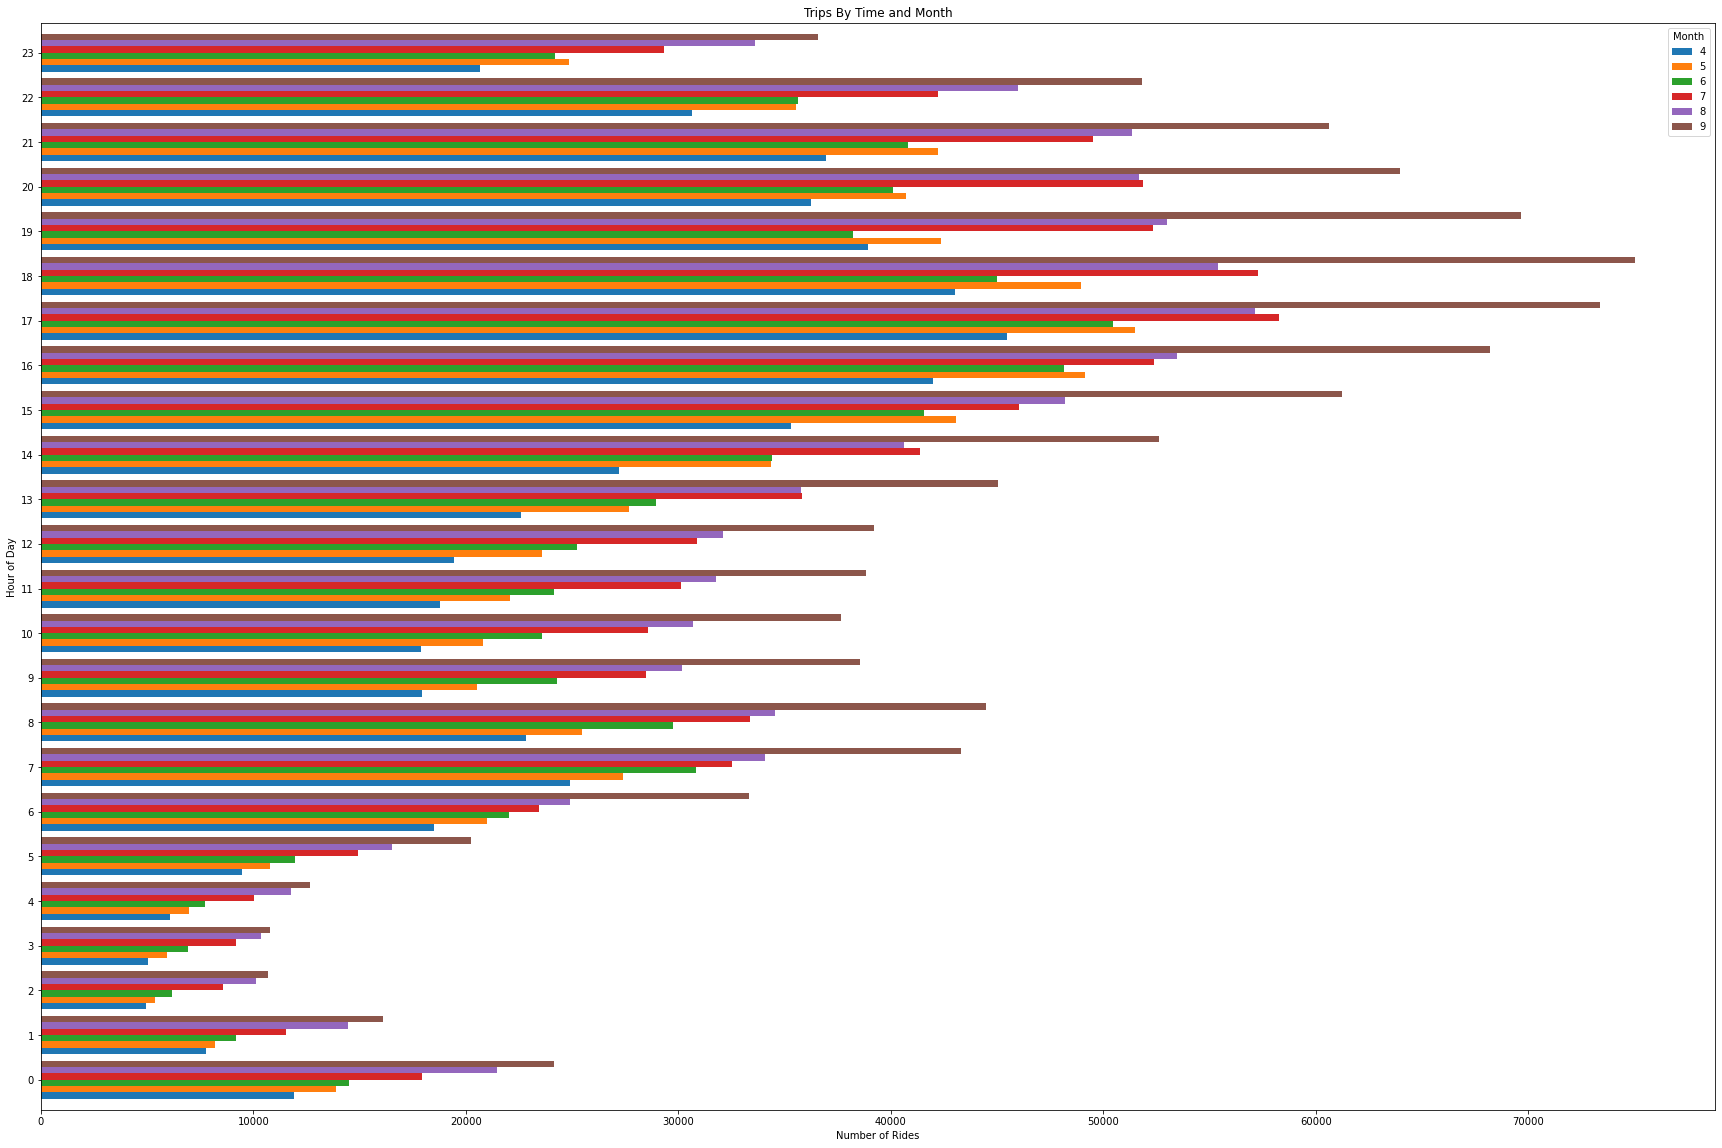

In [255]:
# Trips by Hour and Month
df.groupby('Month').Hour.value_counts().unstack(0).plot.barh(width=.85)
plt.rcParams["figure.figsize"] = [10, 5]
plt.title('Trips By Time and Month')
plt.ylabel('Hour of Day')
plt.xlabel('Number of Rides')

In [261]:
# Return Total Rides for Each Day of Month
RidesEachDay = df.pivot_table(index=['MonthDay'], values='Base', aggfunc='count')
RidesEachDay/30

,Base
MonthDay,
1,4247.666667
2,4773.366667
3,4766.100000
4,4697.433333
5,4901.800000
6,4662.866667
7,4783.433333
8,4866.133333
9,5171.166667


Text(0.5, 0, 'Number of Rides VS Day of Month')

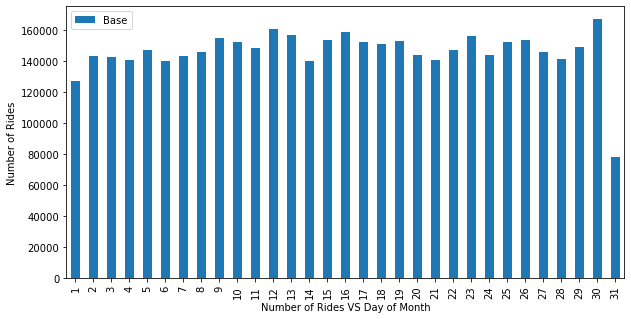

In [262]:
# Total Trips Everyday
RidesEachDay.plot(kind='bar')
plt.ylabel('Number of Rides')
plt.xlabel('Number of Rides VS Day of Month')

Text(0.5, 0, 'Number of Rides')

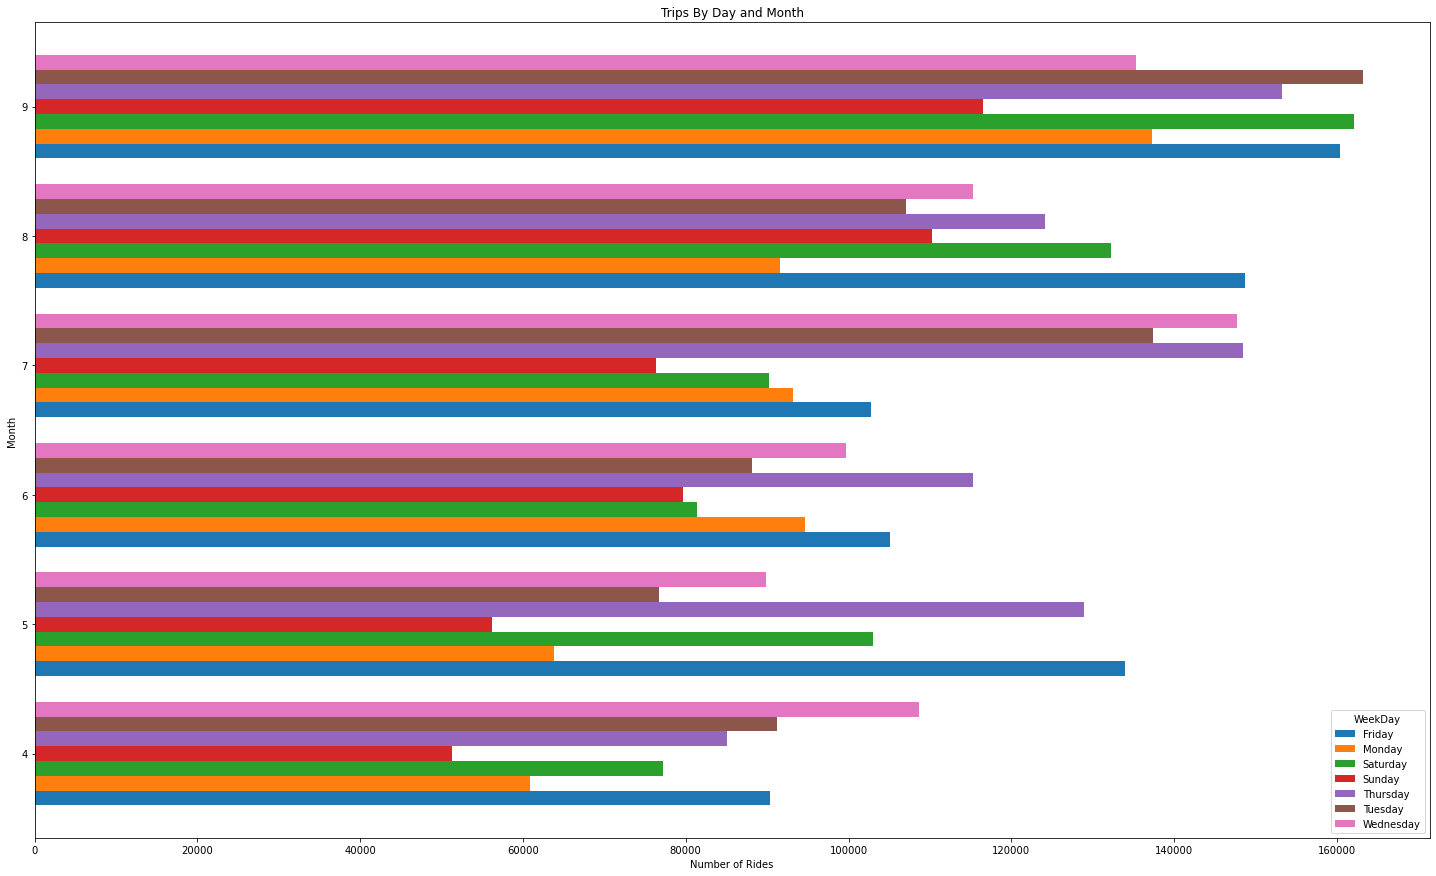

In [265]:
# Trips By Day and Month
df.groupby('WeekDay').Month.value_counts().unstack(0).plot.barh(width=0.8)
plt.rcParams["figure.figsize"] = [20, 15]
plt.title('Trips By Day and Month')
plt.ylabel('Month')
plt.xlabel('Number of Rides')

In [266]:
# Return Total Trips Taking Place in Each Month During a Year
rides_month_year = df.groupby('Year').Month.value_counts()
rides_month_year

Year  Month
2014  9        1028136
      8         829275
      7         796121
      6         663844
      5         652435
      4         564516
Name: Month, dtype: int64

Text(0.5, 0, 'Month')

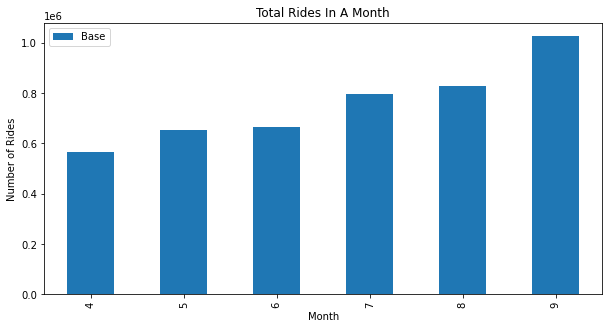

In [269]:
# Trips By Month
RidesEachMonth = df.pivot_table(index=['Month'], values='Base', aggfunc='count')
RidesEachMonth
RidesEachMonth.plot(kind='bar')
plt.rcParams["figure.figsize"] = [5, 2]
plt.title('Total Rides In A Month')
plt.ylabel('Number of Rides')
plt.xlabel('Month')

In [270]:
# Trips By Base 
rides_base = df.pivot_table(index=['Base'], values='Year', aggfunc='count')
rides_base

,Year
Base,
B02512,205673
B02598,1393113
B02617,1458853
B02682,1212789
B02764,263899


### 3 Cross Analysis 
Next, I will continue my exploration with Heatmaps:
   - Heatmap by Trips By Day and Hour
   - Heatmap by Month and Day
   - Heatmap by Month and Weekday
   - Heatmap by Month and Base
   - Heatmap by Base and Weekday

In [271]:
# Trips By Base and Month
rides_base_month = df.groupby('Base').Month.value_counts()
rides_base_month

Base    Month
B02512  5         36765
        4         35536
        7         35021
        9         34370
        6         32509
        8         31472
B02598  5        260549
        7        245597
        6        242975
        9        240600
        8        220129
        4        183263
B02617  9        377695
        8        355803
        7        310160
        6        184460
        5        122734
        4        108001
B02682  4        227808
        5        222883
        9        197138
        7        196754
        6        194926
        8        173280
B02764  9        178333
        8         48591
        4          9908
        5          9504
        6          8974
        7          8589
Name: Month, dtype: int64

In [272]:
# Trips By Base and Day of Week
rides_base_weekday = df.groupby('Base').WeekDay.value_counts()
rides_base_weekday

Base    WeekDay  
B02512  Thursday      35032
        Friday        33319
        Wednesday     32929
        Tuesday       31670
        Saturday      26773
        Monday        25460
        Sunday        20490
B02598  Thursday     235157
        Friday       229908
        Wednesday    216644
        Tuesday      202378
        Saturday     198832
        Monday       163542
        Sunday       146652
B02617  Thursday     240216
        Friday       234379
        Wednesday    222669
        Tuesday      214167
        Saturday     206554
        Monday       176416
        Sunday       164452
B02682  Thursday     205091
        Friday       201594
        Wednesday    189863
        Tuesday      176198
        Saturday     170160
        Monday       143372
        Sunday       126511
B02764  Saturday      43795
        Friday        41939
        Thursday      39649
        Tuesday       39376
        Wednesday     34383
        Monday        32682
        Sunday        32075
Na

In [299]:
# Return Trips By Day and Hour
hour_day = df.groupby('Hour MonthDay'.split()).apply(count_rows).unstack()
hour_day.head()

MonthDay,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
Hour,,,,,,,,,,,,,,,,,,,,,
0,3247,2480,3415,2944,2786,4623,3715,2882,2708,3351,...,2852,2605,3277,2442,3887,5304,4224,2732,2439,2209
1,1982,1600,2176,1718,1567,2932,2326,1672,1757,2167,...,1662,1608,2090,1525,3123,3712,2711,1862,1547,1407
2,1284,1109,1434,1217,1047,1902,1533,1147,1246,1495,...,1207,1163,1480,1098,2087,2407,1894,1442,1135,1107
3,1331,1442,1489,1449,1278,1599,1622,1509,1501,1466,...,1503,1465,1520,1472,1840,2098,1846,1717,1436,935
4,1458,1897,1578,1737,1648,1584,1793,1921,1911,1614,...,1984,1994,1825,1972,1770,1759,1916,1990,1864,788


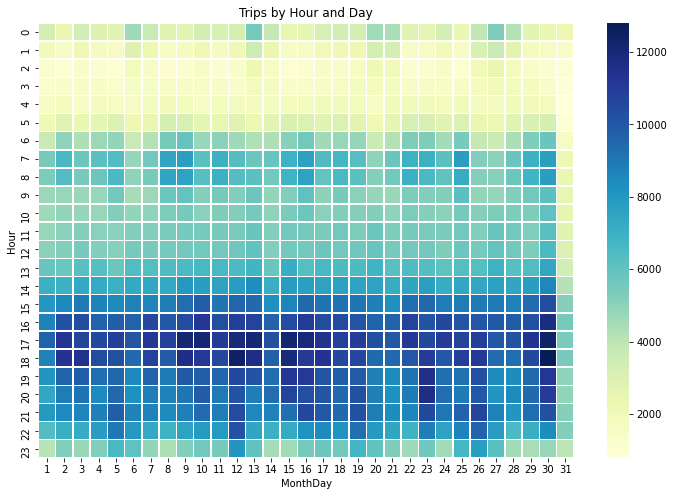

In [300]:
# Heat Map of Trips By Day and Hour
plt.figure(figsize = (12,8))

#Using the seaborn heatmap function 
ax = sns.heatmap(hour_day, cmap=cm.YlGnBu, linewidth = .5)
ax.set(title="Trips by Hour and Day");

#### Analysing the results
We see that the number of rides are increasing throughout the day, with a peak demand in the evening between 16:00 and 18:00.

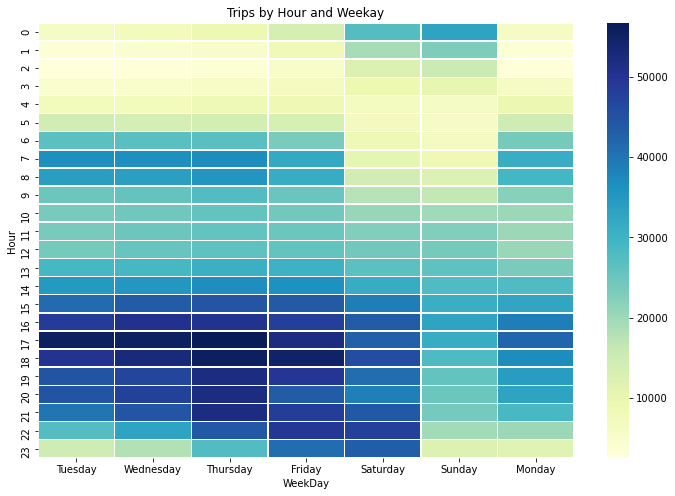

In [303]:
# Return Trips By Day and Hour
hour_weekday = df.groupby('Hour WeekDay'.split(), sort = False).apply(count_rows).unstack()
hour_day.head()

# Heat Map of Trips By Day and Hour
plt.figure(figsize = (12,8))

#Using the seaborn heatmap function 
ax = sns.heatmap(hour_weekday, cmap=cm.YlGnBu, linewidth = .5)
ax.set(title="Trips by Hour and Weekay");

#### Analysing the results
We can see that there are more rides during the work week (Monday-Friday) from 16:00 to 21:00. Rides remain high a little later on Fridays compared to the rest of the week and closely matches to Saturday.  

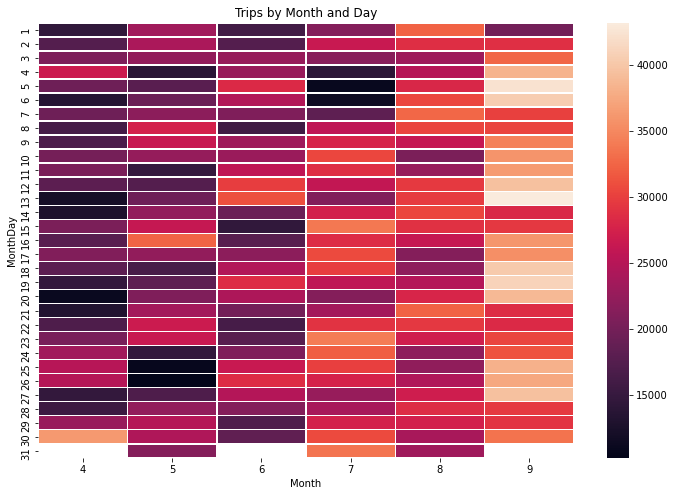

In [292]:
#Create & Return Month and Day dataframe
month_day = df.groupby('MonthDay Month'.split()).apply(count_rows).unstack()
month_day.head()

# Heat Map of Month and Day
plt.figure(figsize = (12,8))

ax = sns.heatmap(month_day, linewidth = .5)
ax.set(title="Trips by Month and Day");

#### Analysing the results
We can see that the number of rides increase each month, we can say that from April to September, the demand for Uber could be increasing due to the warmer weather/ sun setting later. 

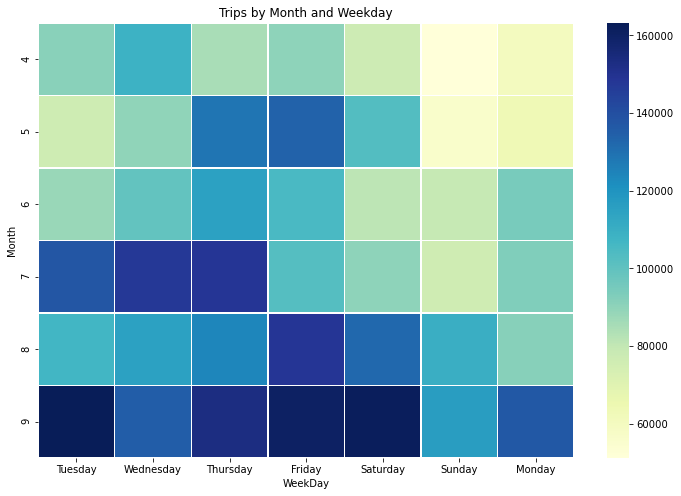

In [298]:
#Create & Return Month and Week Day dataframe
month_weekday = df.groupby('Month WeekDay'.split(), sort = False).apply(count_rows).unstack()
month_weekday.head()

# Heat Map of Month and Week Day
plt.figure(figsize = (12,8))

ax = sns.heatmap(month_weekday, cmap=cm.YlGnBu, linewidth = .5)
ax.set(title="Trips by Month and Weekday");

#### Analysing the results
We can see that weekdays are significantly busier in Septmber compared to April 

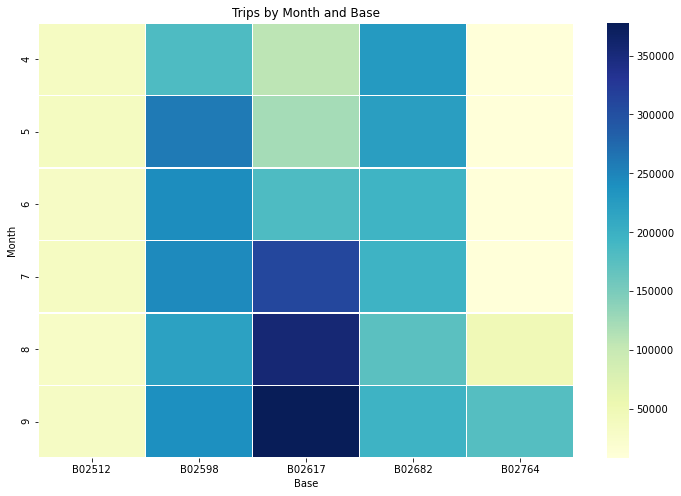

In [287]:
#Create & Return Month and Base dataframe
month_base = df.groupby('Month Base'.split()).apply(count_rows).unstack()
month_base.head()

# Heat Map of Month and Base
plt.figure(figsize = (12,8))

ax = sns.heatmap(month_base, cmap=cm.YlGnBu, linewidth = .5)
ax.set(title="Trips by Month and Base");


#### Analysing the results
Base 02617 is the most popular area to get an Uber in the summer months from July-Sept, this could be do to being close to a park or water

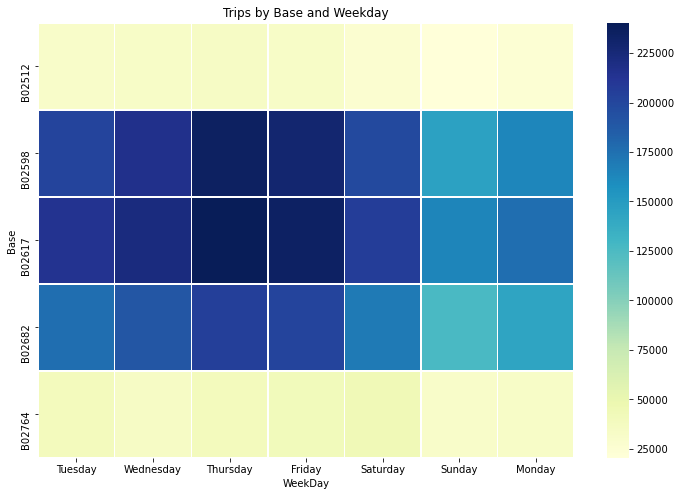

In [297]:
#Create & Return Base and Weekday dataframe
base_weekday = df.groupby('Base WeekDay'.split(), sort = False).apply(count_rows).unstack()
base_weekday.head()

# Heat Map of Base and Weekday
plt.figure(figsize = (12,8))

ax = sns.heatmap(base_weekday, cmap=cm.YlGnBu, linewidth = .5)
ax.set(title="Trips by Base and Weekday");

In [ ]:
#### Analysis the Results 
